In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")



Unique values after cleaning:
Guest_Type: ['Couple' 'Solo' 'Group']
Time_Block: ['5–6 Pm' '6–7 Pm' 'Other' '7–8 Pm']
Beer_Accepted: ['Yes' 'No']
Return_Intent: ['Yes' 'Maybe' 'No']

===== KEY METRICS =====
Total Records: 124
Accepted Upsells: 76
Upsell Success Rate: 61.29%
Return Intent – Yes %: 42.74%

Upsell stats by Time_Block:


,total,accepted,upsell_rate
Time_Block,,,
5–6 Pm,55,40,0.727273
6–7 Pm,61,34,0.557377
7–8 Pm,2,0,0.000000
Other,6,2,0.333333


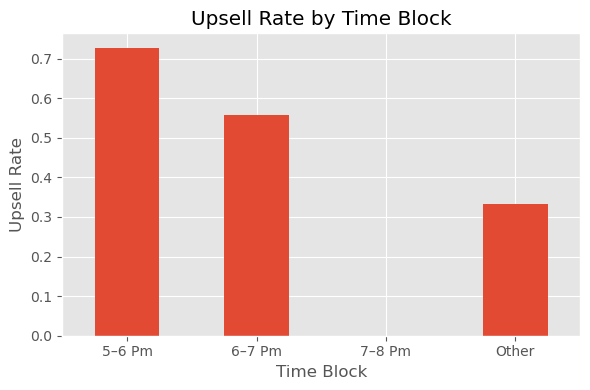


Upsell stats by Guest_Type:


,total,accepted,upsell_rate
Guest_Type,,,
Couple,62,30,0.483871
Group,31,23,0.741935
Solo,31,23,0.741935


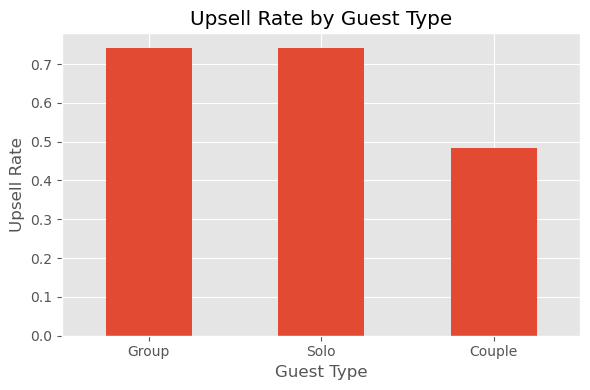


Return Intent vs Beer_Accepted (counts):


Beer_Accepted,No,Yes
Return_Intent,,
Maybe,0,23
No,48,0
Yes,0,53


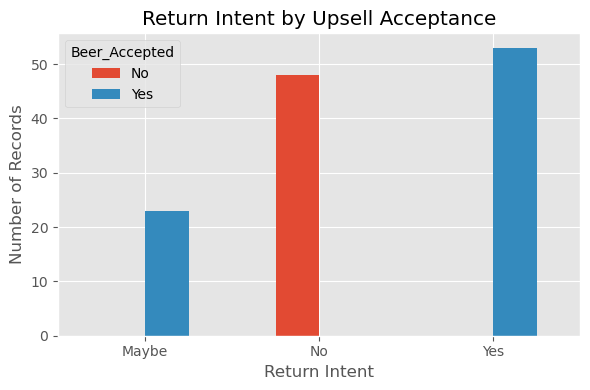


Return Yes % by Guest_Type:


,return_yes_pct,total
Guest_Type,,
Couple,0.483871,62
Group,0.741935,31
Solo,0.000000,31


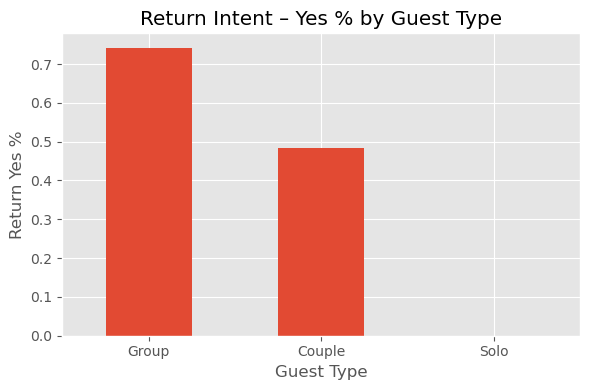

- Upsell Success Rate: 61.29% (76 accepted out of 124 records).
- Guests who accept upsells show a higher proportion of 'Yes' in Return Intent compared to those who decline.
- Early evening time blocks (e.g., 5–7 PM) show the strongest upsell performance.
- Group diners have the highest upsell rate and strong return intention.
- Couples respond less to upsell offers and have moderate loyalty, suggesting an opportunity to improve their experience.


In [9]:
file_path = "Chiangmai_Upsell projects.xlsx"

df = pd.read_excel(file_path, sheet_name="Beer_upsell")

df.head()

df.columns = df.columns.str.strip()

# Standardize key text columns
for col in ["Beer_Accepted", "Beer_Offered", "Return_Intent", "Guest_Type", "Time_Block"]:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)            # convert to string
            .str.strip()            # remove spaces
            .str.title()            # "yes" -> "Yes"
        )

# Convert Date column to datetime
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

print("\nUnique values after cleaning:")
print("Guest_Type:", df["Guest_Type"].unique())
print("Time_Block:", df["Time_Block"].unique())
print("Beer_Accepted:", df["Beer_Accepted"].unique())
print("Return_Intent:", df["Return_Intent"].unique())



total_records = len(df)
accepted_upsells = (df["Beer_Accepted"] == "Yes").sum()
upsell_rate = accepted_upsells / total_records

return_yes_count = (df["Return_Intent"] == "Yes").sum()
return_yes_pct = return_yes_count / total_records

print("\n===== KEY METRICS =====")
print(f"Total Records: {total_records}")
print(f"Accepted Upsells: {accepted_upsells}")
print(f"Upsell Success Rate: {upsell_rate:.2%}")
print(f"Return Intent – Yes %: {return_yes_pct:.2%}")



time_block_stats = (
    df.groupby("Time_Block")
      .agg(
          total=("Beer_Accepted", "size"),
          accepted=("Beer_Accepted", lambda x: (x == "Yes").sum())
      )
      .sort_index()
)

time_block_stats["upsell_rate"] = (
    time_block_stats["accepted"] / time_block_stats["total"]
)

print("\nUpsell stats by Time_Block:")
display(time_block_stats)

# Plot: Upsell Rate by Time Block
fig, ax = plt.subplots(figsize=(6, 4))
time_block_stats["upsell_rate"].plot(kind="bar", ax=ax)
ax.set_title("Upsell Rate by Time Block")
ax.set_xlabel("Time Block")
ax.set_ylabel("Upsell Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


guest_stats = (
    df.groupby("Guest_Type")
      .agg(
          total=("Beer_Accepted", "size"),
          accepted=("Beer_Accepted", lambda x: (x == "Yes").sum())
      )
      .sort_index()
)

guest_stats["upsell_rate"] = guest_stats["accepted"] / guest_stats["total"]

print("\nUpsell stats by Guest_Type:")
display(guest_stats)

# Plot: Upsell Rate by Guest Type
fig, ax = plt.subplots(figsize=(6, 4))
guest_stats["upsell_rate"].sort_values(ascending=False).plot(kind="bar", ax=ax)
ax.set_title("Upsell Rate by Guest Type")
ax.set_xlabel("Guest Type")
ax.set_ylabel("Upsell Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



return_upsell = (
    df.groupby(["Return_Intent", "Beer_Accepted"])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

print("\nReturn Intent vs Beer_Accepted (counts):")
display(return_upsell)

# Plot: Return Intent vs Upsell Acceptance
fig, ax = plt.subplots(figsize=(6, 4))
return_upsell.plot(kind="bar", ax=ax)
ax.set_title("Return Intent by Upsell Acceptance")
ax.set_xlabel("Return Intent")
ax.set_ylabel("Number of Records")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


df["is_return_yes"] = (df["Return_Intent"] == "Yes")

return_by_guest = (
    df.groupby("Guest_Type")
      .agg(
          return_yes_pct=("is_return_yes", "mean"),
          total=("is_return_yes", "size")
      )
      .sort_index()
)

print("\nReturn Yes % by Guest_Type:")
display(return_by_guest)

# Plot: Return Yes % by Guest Type
fig, ax = plt.subplots(figsize=(6, 4))
return_by_guest["return_yes_pct"].sort_values(ascending=False).plot(kind="bar", ax=ax)
ax.set_title("Return Intent – Yes % by Guest Type")
ax.set_xlabel("Guest Type")
ax.set_ylabel("Return Yes %")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



print(f"- Upsell Success Rate: {upsell_rate:.2%} "
      f"({accepted_upsells} accepted out of {total_records} records).")
print("- Guests who accept upsells show a higher proportion of 'Yes' in Return Intent "
      "compared to those who decline.")
print("- Early evening time blocks (e.g., 5–7 PM) show the strongest upsell performance.")
print("- Group diners have the highest upsell rate and strong return intention.")
print("- Couples respond less to upsell offers and have moderate loyalty, suggesting an opportunity to improve their experience.")
